# Curso de Capacitación en Python para Data Science - Sesión 8

<img src='https://www.danielsaromo.xyz/assets/img/logo-pucp.png' width=200px>


Ing. Daniel Saromo (www.danielsaromo.xyz), BSc. Stev Huamán (mhuamanr@pucp.edu.pe)

<font color='#33FFEE'> Desafío 8: Clusterización de datos en Python</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio8_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

## Desafío de la semana <font color=red> (20 puntos) </font>

### Parte 1: Compresión de imágenes usando aprendizaje no supervisado <font color=red> (12 puntos) </font>

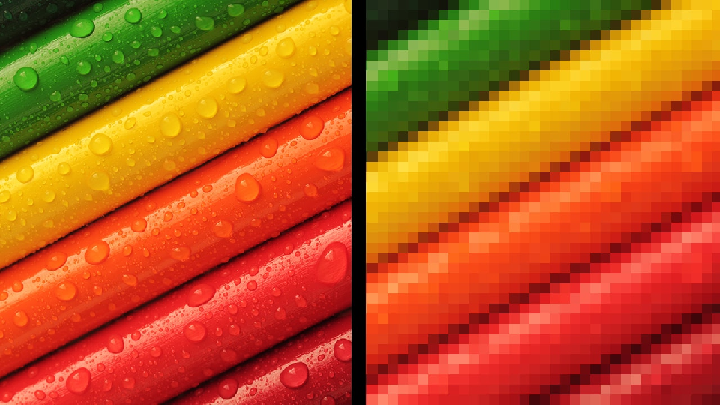

Dentro del área de Machine Learning, las técnicas de clusterización están dentro de la categoría de aprendizaje no supervisado. Una estrategia común utilizada en procesamiento de señales e imágenes digitales se llama [Vector quantization](https://en.wikipedia.org/wiki/Vector_quantization), la cual utiliza clusterización para reducir la cantidad de colores diferentes que puede tomar una imagen.

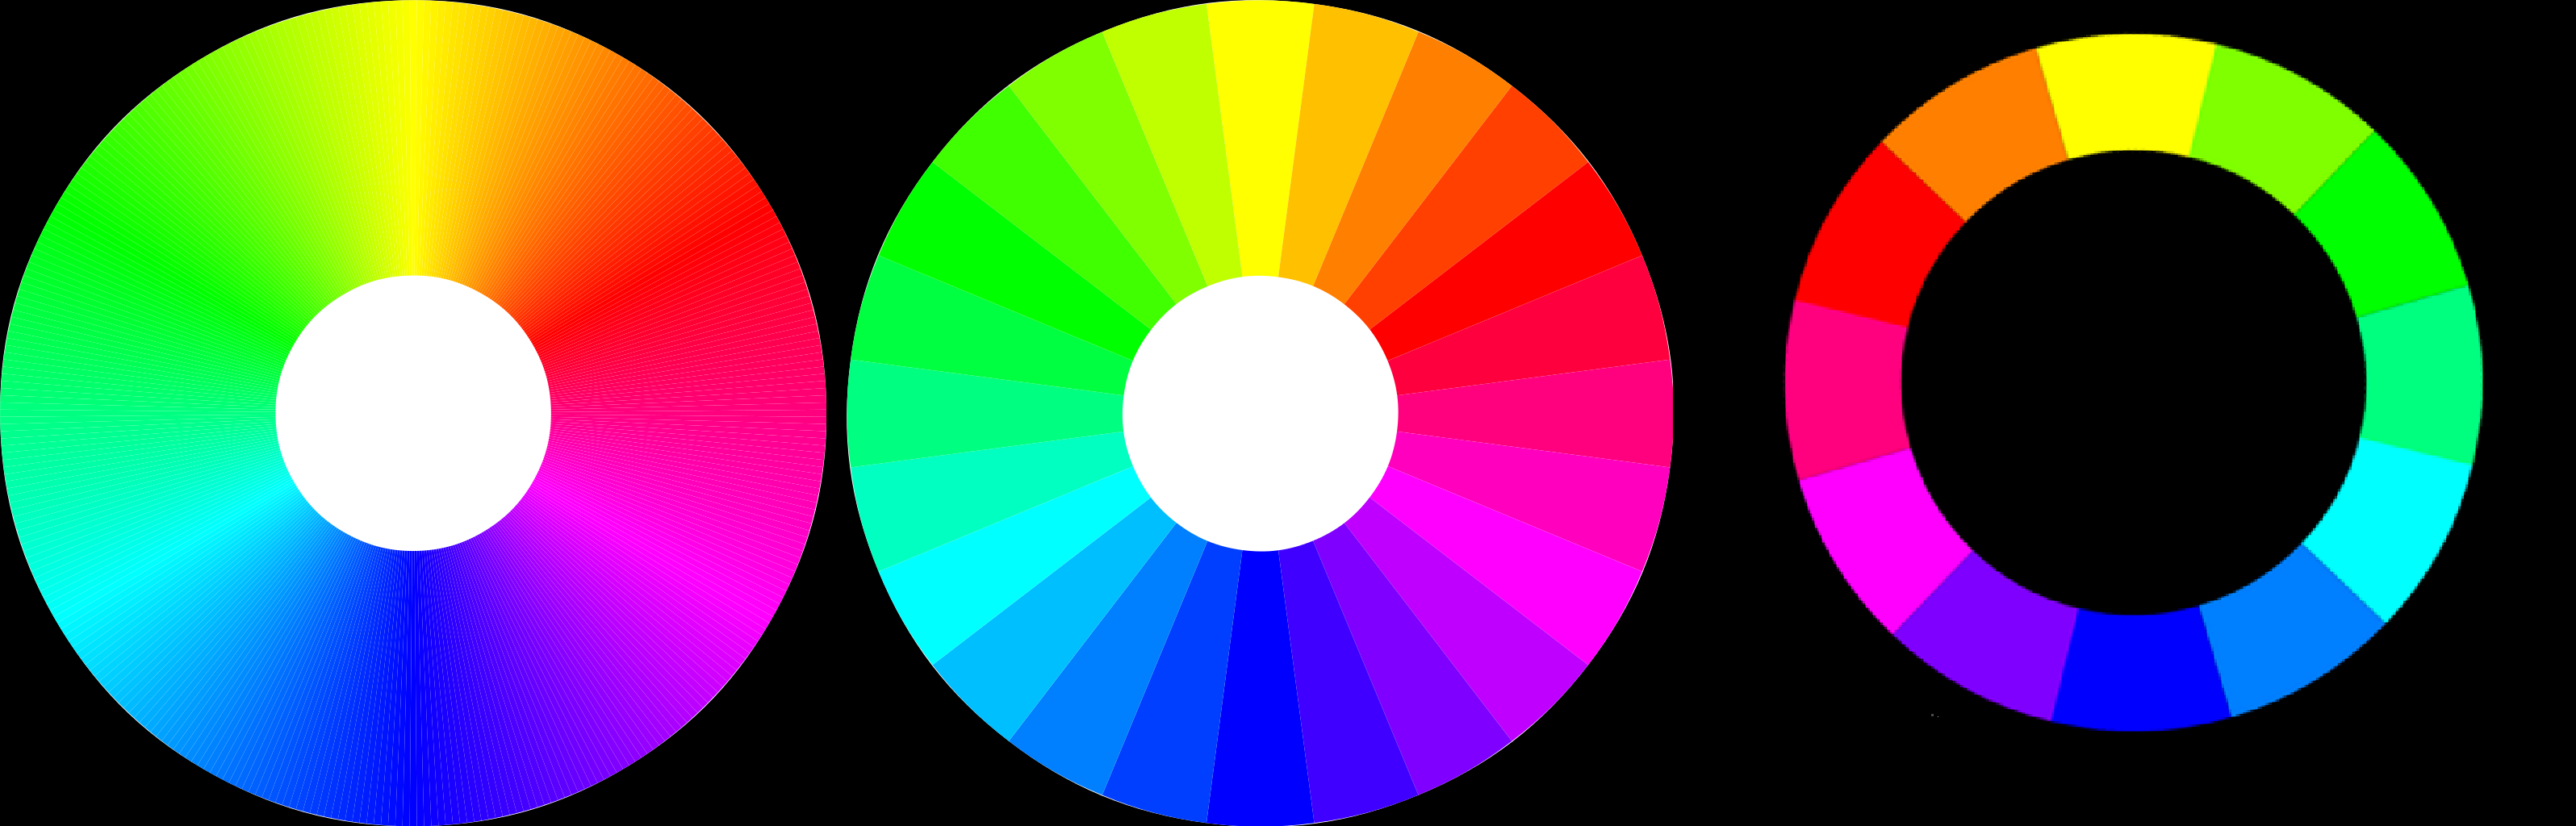

Seleccionamos una imagen de alta resolución, disponible en la libreria sklearn.

En el presente cuadernillo, buscaremos comprimir la imagen de manera que sus pixeles puedan tomar solamente 16 posibles colores.

In [217]:
%matplotlib inline
import matplotlib.pyplot as plt

# Importa librerias necesarias
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

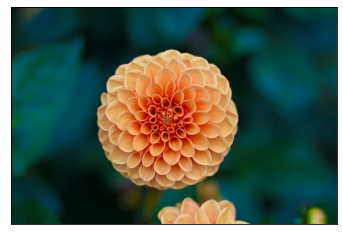

In [218]:
# Se requiere tener instalada la librería `pillow`: !pip install pillow
from sklearn.datasets import load_sample_image
flor = load_sample_image("flower.jpg")
plt.axes(xticks=[], yticks=[])
plt.imshow(flor)

In [219]:
flor.shape

(427, 640, 3)

In [220]:
flor.max(), flor.min()

(255, 0)

Observamos que la imagen es de 8 bits. Con dicha información, la escalamos al rango de 0 a 1.

#### Escalar las imágenes para que los pixeles estén en el rango de 0 a 1: <font color='red'>2 puntos</font>

In [221]:
flor2 = flor.reshape(-1,3)
flor_scaled = MinMaxScaler().fit_transform(flor2)
flor3 = flor_scaled.reshape(flor.shape)
flor3.shape

(427, 640, 3)

#### Convertir la matriz 3D escalada a una matriz 2D, de 3 columnas: <font color='red'>2 puntos</font>

In [222]:
data = flor_scaled_3d.reshape(-1,3)
data.shape

(273280, 3)

#### Continuamos

Creamos las funciones para graficar:

In [171]:
import numpy as np

def plot_pixels_2D(data, title, colors=None, N=10000, centroids = None):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    if centroids is not None: ax[0].scatter(centroids[:, 0], centroids[:, 1], marker="x", s=369, linewidths=6,
            color="w", zorder=10)

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    if centroids is not None: ax[1].scatter(centroids[:, 0], centroids[:, 2], marker="x", s=369, linewidths=6,
            color="w", zorder=10)

    fig.suptitle(title, size=20)

In [172]:
import numpy as np

def plot_pixels_3D(data, title, colors=None, N=10000, centroids=None):

    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(12, 12))

    plt.clf()

    # puedes cambiar estos valores para modificar la visualización 3D de la gráfica
    elev = +20
    azim = -60

    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    ax.set_zlim((0,1))
    ax.set_title(title)

    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    ax.scatter(R, G, B, color=colors, marker='.')
    if centroids is not None: ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="x", s=369, linewidths=6,
            color="k", zorder=1000)

In [173]:
cant_colores_posibles = 255*255*255
cant_colores_posibles

16581375

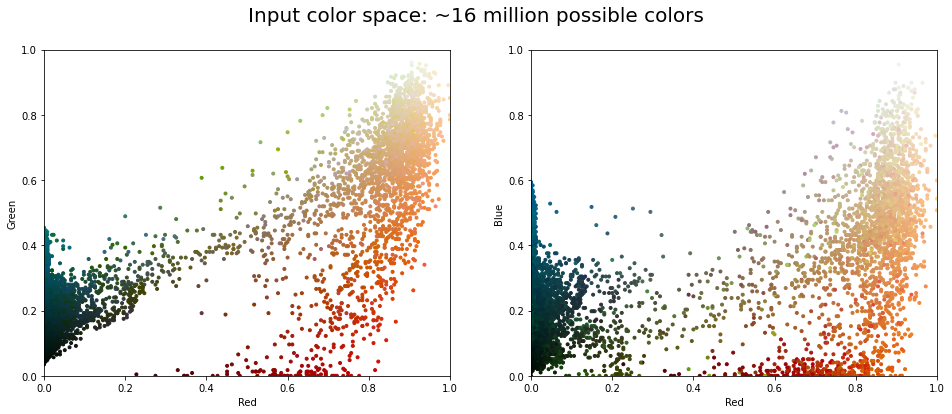

In [223]:
n_pixeles = 10000
plot_pixels_2D(data, title='Input color space: ~16 million possible colors', N=n_pixeles)

In [175]:
n_pixeles = 10000*5
plot_pixels_3D(data, title="Imagen con colores originales - %s pixeles" % str(n_pixeles), N=n_pixeles)

<Figure size 864x864 with 0 Axes>

#### Ejecutar una segmentación mediante `KMeans`: <font color='red'>2 puntos</font>

Recordemos que: En el presente cuadernillo, buscaremos comprimir la imagen de manera que sus pixeles puedan tomar solamente 16 posibles colores.

In [224]:
from sklearn.cluster import KMeans

cant_colores_after_compression = 16 # este es el valor de k

kmeans = KMeans(n_clusters=cant_colores_after_compression, n_init=10, random_state=123) # NO MODIFICAR NI EL RANDOM STATE NI EL N_INIT!
kmeans.fit(data)

#--no modificar state ni init
# se busca 16 colores posibles

KMeans(n_clusters=16, n_init=10, random_state=123)

¿Qué controla el argumento `n_init`?: Veamos la documentación oficial: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Grabar las coordenadas de los centros de los clusters resulltantes: <font color='red'>2 puntos</font>

 Consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para identificar cuál de los ***attributes*** es el que necesitamos en esta parte.

¿Cuántos centroides deberíamos tener?

In [225]:
centroids = kmeans.cluster_centers_
centroids

array([[0.00532156, 0.31345927, 0.36377594],
       [0.86389068, 0.58163366, 0.3534571 ],
       [0.0304856 , 0.15714618, 0.12904106],
       [0.78363587, 0.27629103, 0.04127272],
       [0.88149435, 0.7561397 , 0.58915726],
       [0.02240497, 0.2104094 , 0.20479444],
       [0.01328493, 0.07984631, 0.0625176 ],
       [0.83333265, 0.44346467, 0.19277771],
       [0.20113234, 0.26078024, 0.13841555],
       [0.0027959 , 0.36662347, 0.46364843],
       [0.01014117, 0.25288426, 0.28614737],
       [0.62311222, 0.05045861, 0.02022908],
       [0.46837613, 0.41935863, 0.23386871],
       [0.86257084, 0.6777864 , 0.47250007],
       [0.68507814, 0.54514753, 0.36304243],
       [0.89779667, 0.8498544 , 0.74767486]])

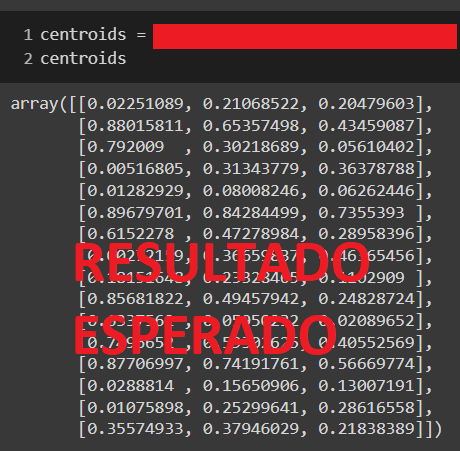

#### Calcular los índices de los clústers más cercanos (que serían los nuevos posibles colores que ahora podrá tomar la imagen) de cada una de las coordenadas que representan a los pixeles de la imagen original: <font color='red'>2 puntos</font>

 Consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para identificar cuál de los ***attributes*** es el que necesitamos en esta parte.

In [178]:
etiquetas = kmeans.labels_
etiquetas

array([6, 6, 6, ..., 2, 2, 2])

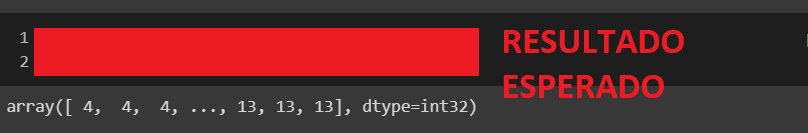

Para este ejemplo, hemos ingresado a la función los mismos pixeles que usamos en el entrenamiento, por lo que el resultado es el mismo.

#### En base a esos índices, calcular los nuevos colores (de la imagen comprimida), usando los centroides grabados previamente: <font color='red'>2 puntos</font>

En la implementación, para calcular los nuevos colores usaremos los índices de los centroides grabados previamente.

A continuación, tenemos los 16 colores de la nueva imagen. Estos colores se repetirán las veces que sean necesarias, de manera que cada uno de los pixeles de la imagen comprimida solamente sea uno de estos 16 colores.

In [179]:
centroids = kmeans.cluster_centers_
centroids

array([[0.00532156, 0.31345927, 0.36377594],
       [0.86389068, 0.58163366, 0.3534571 ],
       [0.0304856 , 0.15714618, 0.12904106],
       [0.78363587, 0.27629103, 0.04127272],
       [0.88149435, 0.7561397 , 0.58915726],
       [0.02240497, 0.2104094 , 0.20479444],
       [0.01328493, 0.07984631, 0.0625176 ],
       [0.83333265, 0.44346467, 0.19277771],
       [0.20113234, 0.26078024, 0.13841555],
       [0.0027959 , 0.36662347, 0.46364843],
       [0.01014117, 0.25288426, 0.28614737],
       [0.62311222, 0.05045861, 0.02022908],
       [0.46837613, 0.41935863, 0.23386871],
       [0.86257084, 0.6777864 , 0.47250007],
       [0.68507814, 0.54514753, 0.36304243],
       [0.89779667, 0.8498544 , 0.74767486]])

In [180]:
centroids.shape

(16, 3)

Ahora calculamos los nuevos centroides utilizando los índices de dichos centroides:

In [181]:
kmeans.predict(centroids)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [182]:
new_colors = centroids[etiquetas]

In [183]:
new_colors

array([[0.01328493, 0.07984631, 0.0625176 ],
       [0.01328493, 0.07984631, 0.0625176 ],
       [0.01328493, 0.07984631, 0.0625176 ],
       ...,
       [0.0304856 , 0.15714618, 0.12904106],
       [0.0304856 , 0.15714618, 0.12904106],
       [0.0304856 , 0.15714618, 0.12904106]])

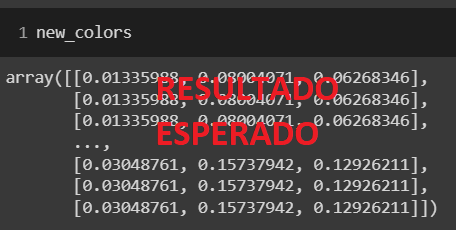

In [184]:
new_colors.shape

(273280, 3)

Para entender la relación entre la matriz de nuevos colores, y la matriz de centroides, considerar lo siguiente:

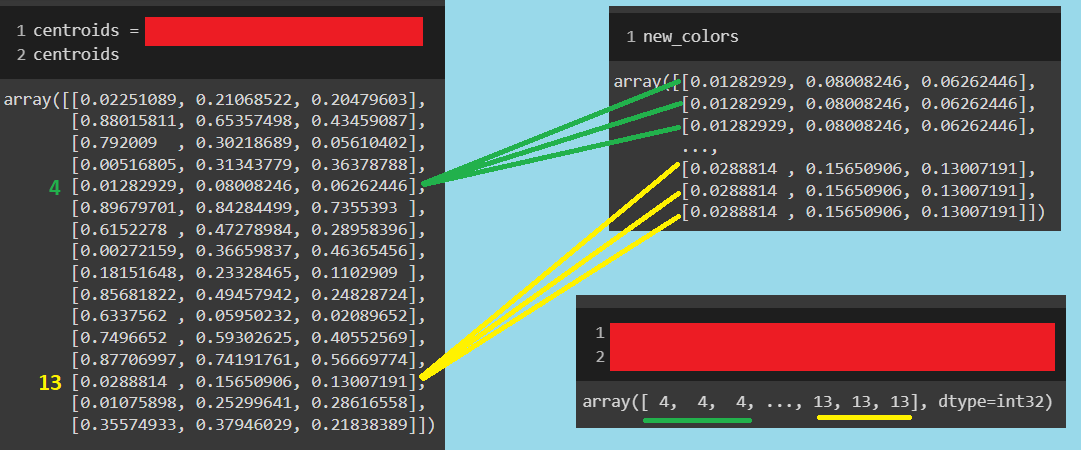

Ploteamos los pixeles agrupados en los nuevos grupos de colores posibles que tendrá la imagen comprimida.

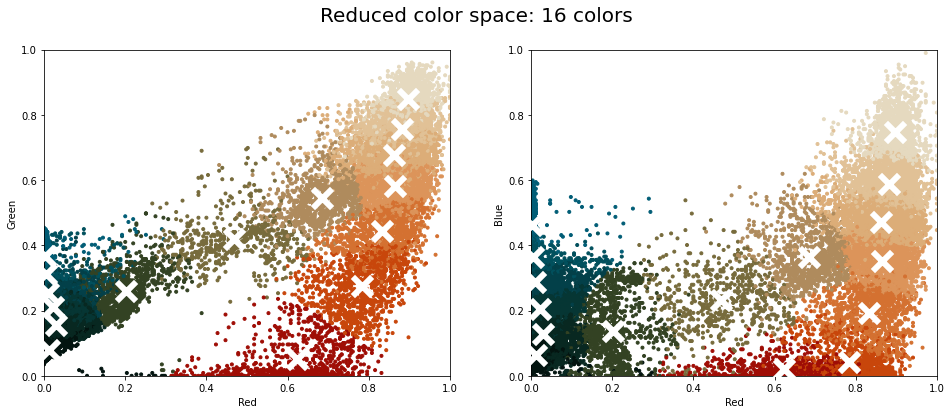

In [185]:
plot_pixels_2D(data, colors=new_colors, centroids = centroids,
            title="Reduced color space: %s colors" % str(cant_colores_after_compression), N=n_pixeles)

In [186]:
plot_pixels_3D(data, colors=new_colors, centroids = centroids,
            title="Espacio de colores reducido: %s colores" %str(cant_colores_after_compression), N=n_pixeles)
plt.show()

<Figure size 864x864 with 0 Axes>

#### Observamos los resultados finales de la compresión

Ahora, las imágenes solamente pueden tener 16 colores diferentes, en lugar de 16 millones!

In [187]:
flor_recolored = new_colors.reshape(flor.shape)

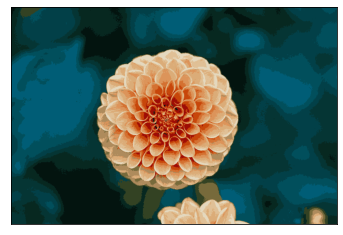

In [188]:
# Se requiere tener instalada la librería `pillow`: !pip install pillow
from sklearn.datasets import load_sample_image
plt.axes(xticks=[], yticks=[])
plt.imshow(flor_recolored)

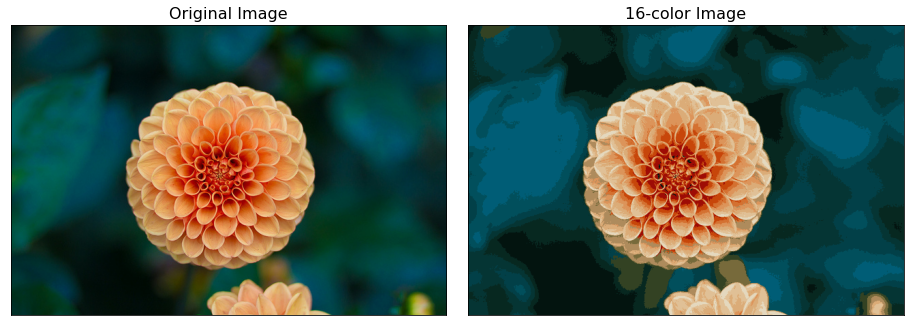

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flor)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flor_recolored)
ax[1].set_title('%s-color Image' % cant_colores_after_compression, size=16)
plt.show()

------------

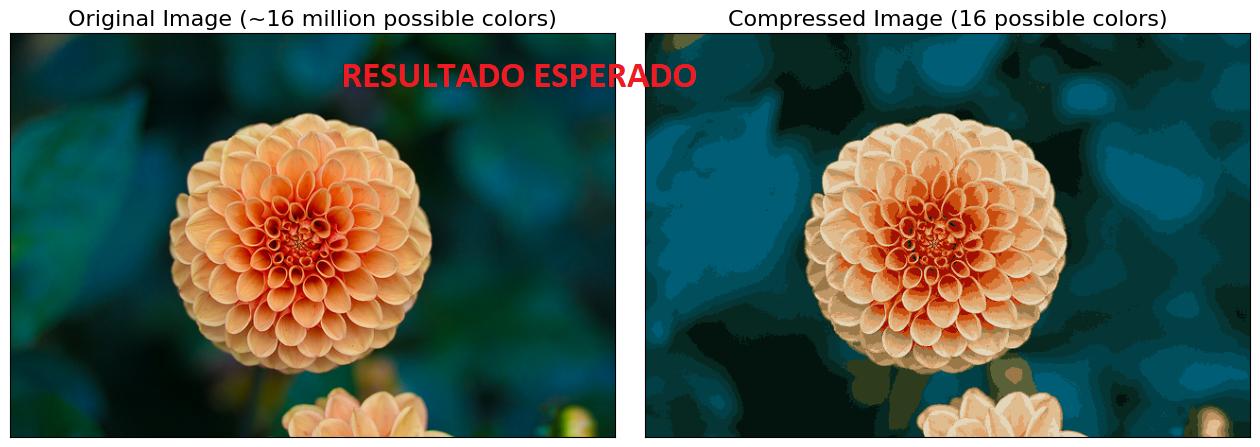

In [190]:
np.unique(flor).shape

(256,)

In [191]:
np.unique(flor_recolored).shape # cada color tiene un vector tridimensional para sus coordenadas R, G, B

(48,)

### Parte 2: Segmentación de clientes    <font color=red> (8 puntos) </font>

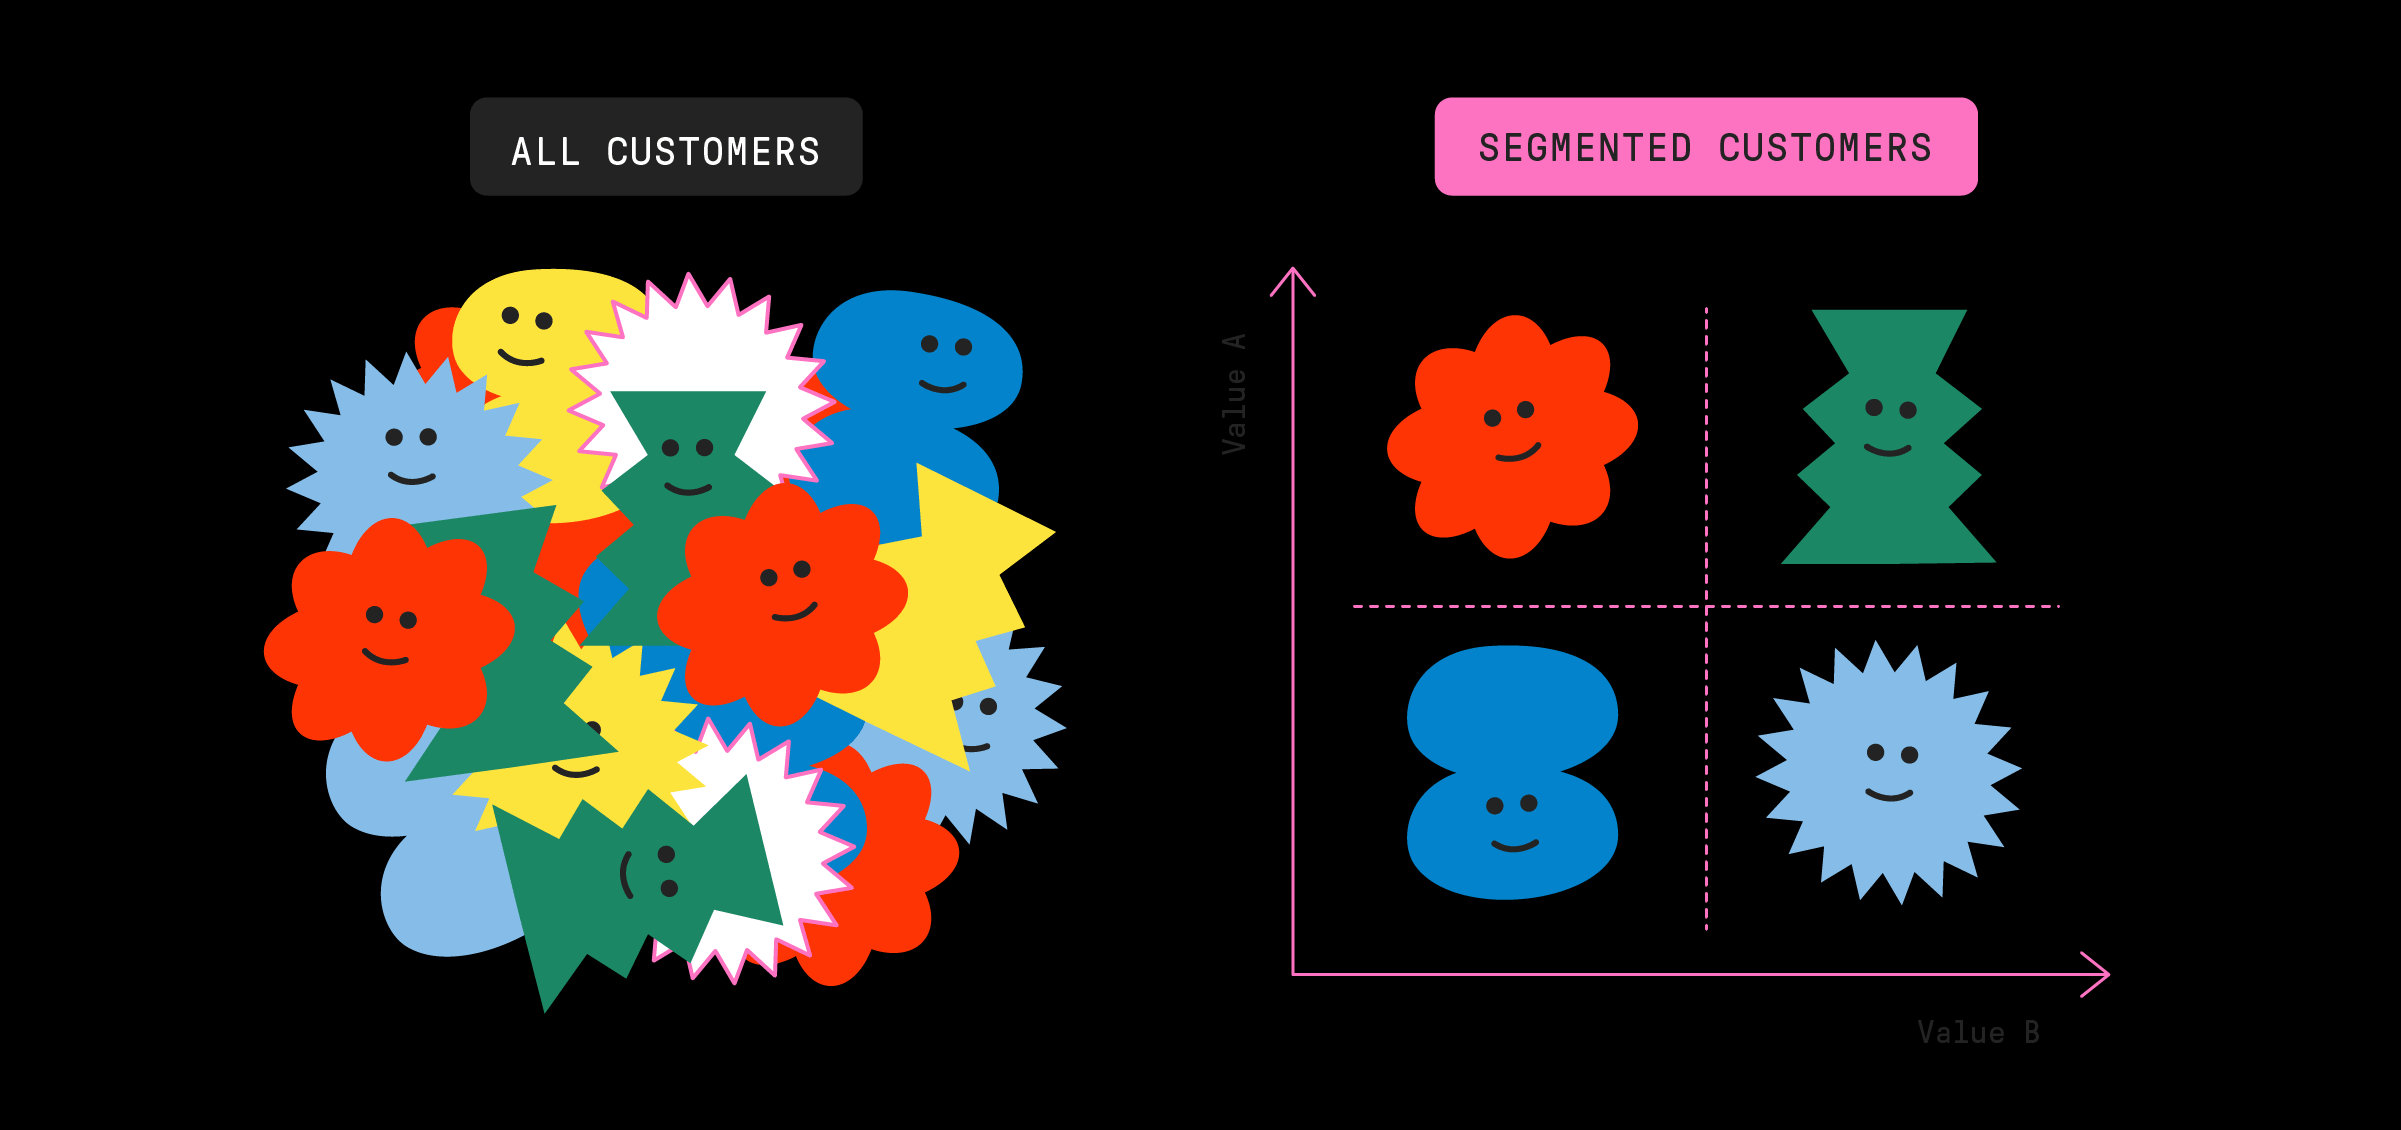

Se tiene un dataset (`Wholesale_customers_data.csv`) que contiene informacion de clientes sobre compras anuales de 6 tipos de productos (ver https://archive.ics.uci.edu/ml/datasets/wholesale+customers). Se pide lo siguiente:

In [192]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
df = pd.read_csv('https://github.com/DanielSaromo/Courses_DataFiles/blob/main/P4DS_CETAM/Wholesale_customers_data.csv?raw=true')

In [194]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

#### Escalar todas las variables numericas entre 0 y 1. Previamente, eliminar las variables categoricas (Channel y Region): <font color='red'>2 punto</font>

In [195]:
# importa libreria StandardScaler
from sklearn.preprocessing import StandardScaler

#Eliminamos los dos registros solicitados
df_customers = df.drop(['Channel', 'Region'], axis=1)
df_customers.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

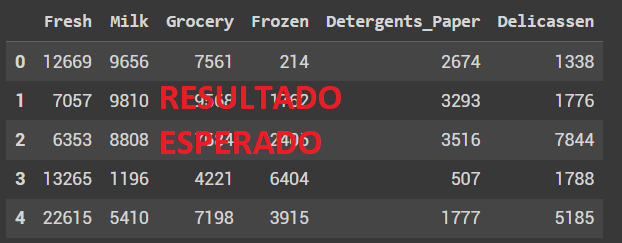

In [196]:
X_scaled = MinMaxScaler().fit_transform(df_customers)

Como se observa, se han escalado las variables numéricas al rango de 0 (valor mínimo) a 1 (valor máximo).

In [197]:
# convierte el array de datos estandarizados a un DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=df_customers.columns)  
X_scaled.describe()

Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     0.106977    0.078173    0.085671    0.050078          0.070510   
std      0.112774    0.100491    0.102430    0.079789          0.116790   
min      0.000000    0.000000    0.000000    0.000000          0.000000   
25%      0.027863    0.020124    0.023174    0.011788          0.006216   
50%      0.075802    0.048636    0.051225    0.024670          0.019927   
75%      0.150968    0.097154    0.114821    0.058005          0.095997   
max      1.000000    1.000000    1.000000    1.000000          1.000000   

       Delicassen  
count  440.000000  
mean     0.031745  
std      0.058826  
min      0.000000  
25%      0.008453  
50%      0.020077  
75%      0.037907  
max      1.000000

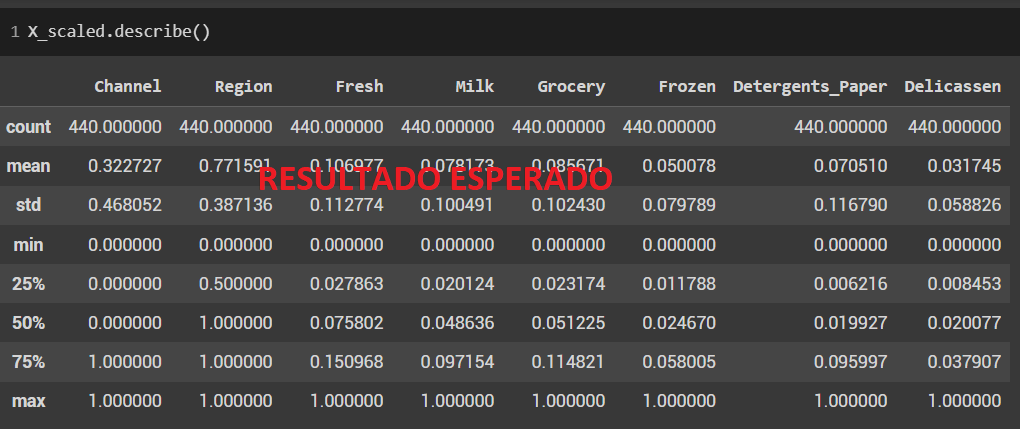

In [198]:
X_scaled.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.112940  0.130727  0.081464  0.003106          0.065427    0.027847
1  0.062899  0.132824  0.103097  0.028548          0.080590    0.036984
2  0.056622  0.119181  0.082790  0.039116          0.086052    0.163559
3  0.118254  0.015536  0.045464  0.104842          0.012346    0.037234
4  0.201626  0.072914  0.077552  0.063934          0.043455    0.108093

#### Mostrar el dendrograma construido con los datos escalados y metodo 'ward': <font color='red'>3 puntos</font>

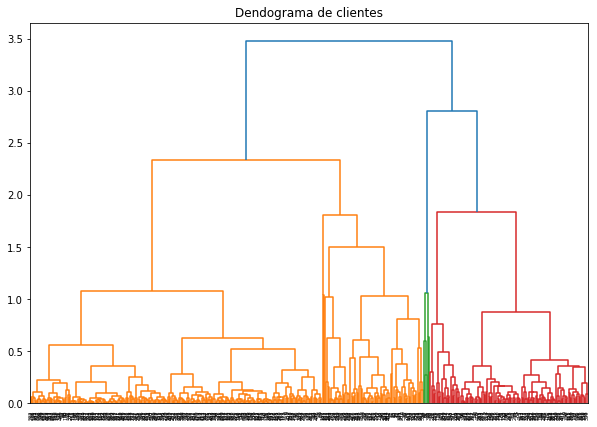

In [199]:
# Libreria para construir el dendrograma
import scipy.cluster.hierarchy as shc   

# Plotea un dendrograma de la data estandarizada contruido con el metodo 'ward'
plt.figure(figsize=(10, 7))
linked = shc.linkage(X_scaled, method='ward')
shc.dendrogram(linked )
plt.title("Dendograma de clientes")
plt.show()

#### Identificar cual seria el numero de clusters mas plausible: <font color='red'>3 puntos</font>

Debe justificar su selección aplicando el criterio indicado en clase. Para ello, **debe modificar la figura anterior** para explicar el criterio usado.

COMPLETAR ESTE TEXTO: Del dendrograma ploteado se puede concluir que existe tendencia a formarse ... grupos.

existe tendencia a formarse tal cantidad de cursos.